In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv("/content/clean_tweets.csv")

In [3]:
#NaN olan satırları silme
df = df.dropna()

In [4]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df["clean"])

In [5]:
# https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf
lda = LatentDirichletAllocation(n_components=8, random_state=42)

In [8]:
#10-20 saniye
lda.fit(X)

LatentDirichletAllocation(n_components=8, random_state=42)

In [9]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words=10, title="Title"):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [10]:
feature_names = vectorizer.get_feature_names_out()

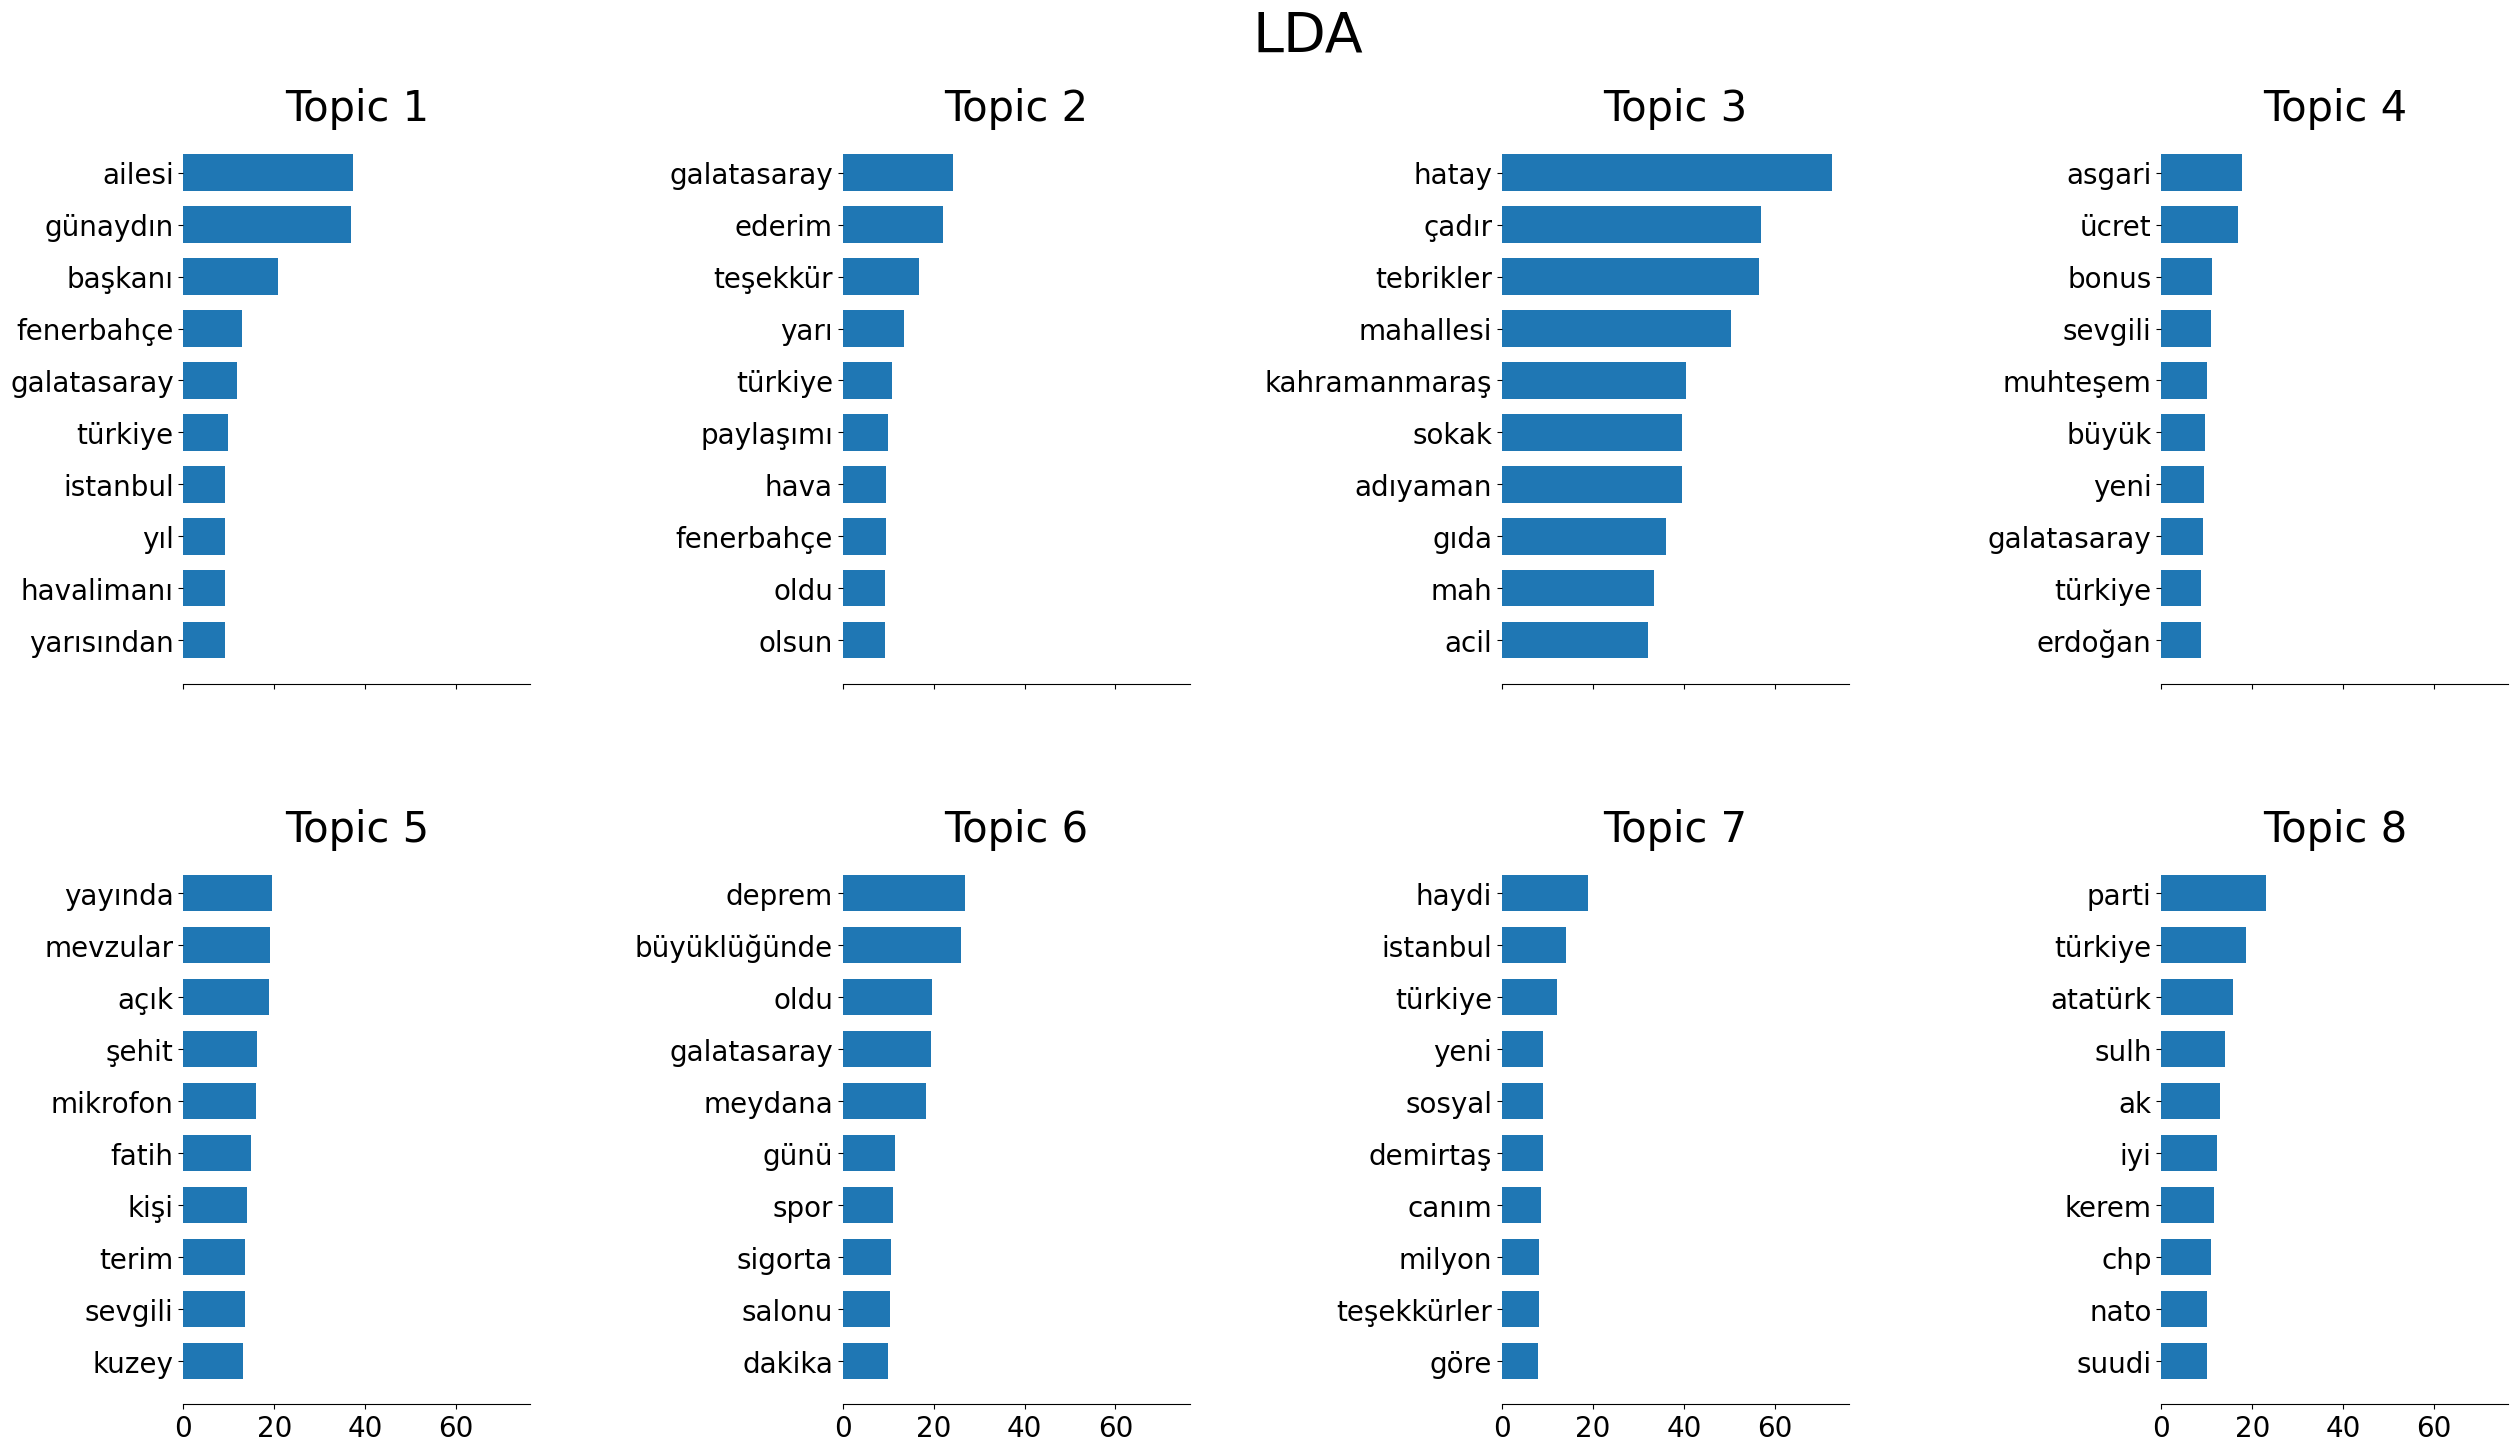

In [11]:
plot_top_words(lda, feature_names, title="LDA")

In [12]:
Z = lda.transform(X)

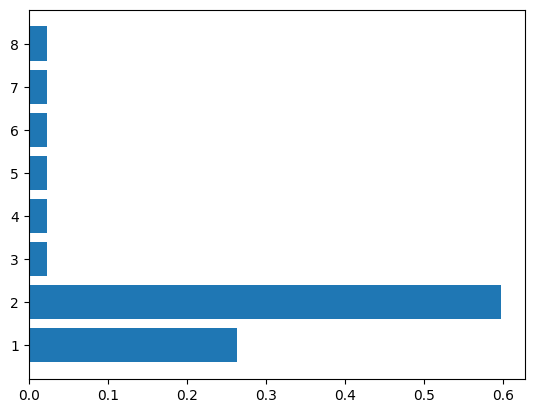

'15 Temmuz’un yıl dönümünde 85 milyon olarak yine tek yürek, tek bileğiz.  Bu tarihî günde bizleri yalnız bırakmayan kardeşlerime, siyasi partilerin genel başkanlarına ve kıymetli misafirlerimize teşekkür ediyorum. 🇹🇷'

In [30]:
i = np.random.choice(len(df))
doc = Z[i]
topics = np.arange(8) + 1

fig, ax = plt.subplots()
ax.barh(topics, doc)
ax.set_yticks(topics)
plt.show()

df.iloc[i]["text"]

In [17]:
# https://en.wikipedia.org/wiki/Kullback–Leibler_divergence iki olasılık dağılımı arasındaki farkı bulur
# mu: multiplicatie update: KLD için gerekli çözümleyici
nmf = NMF(n_components=8, beta_loss="kullback-leibler", solver="mu", random_state=42)

In [18]:
nmf.fit(X)

NMF(beta_loss='kullback-leibler', n_components=8, random_state=42, solver='mu')

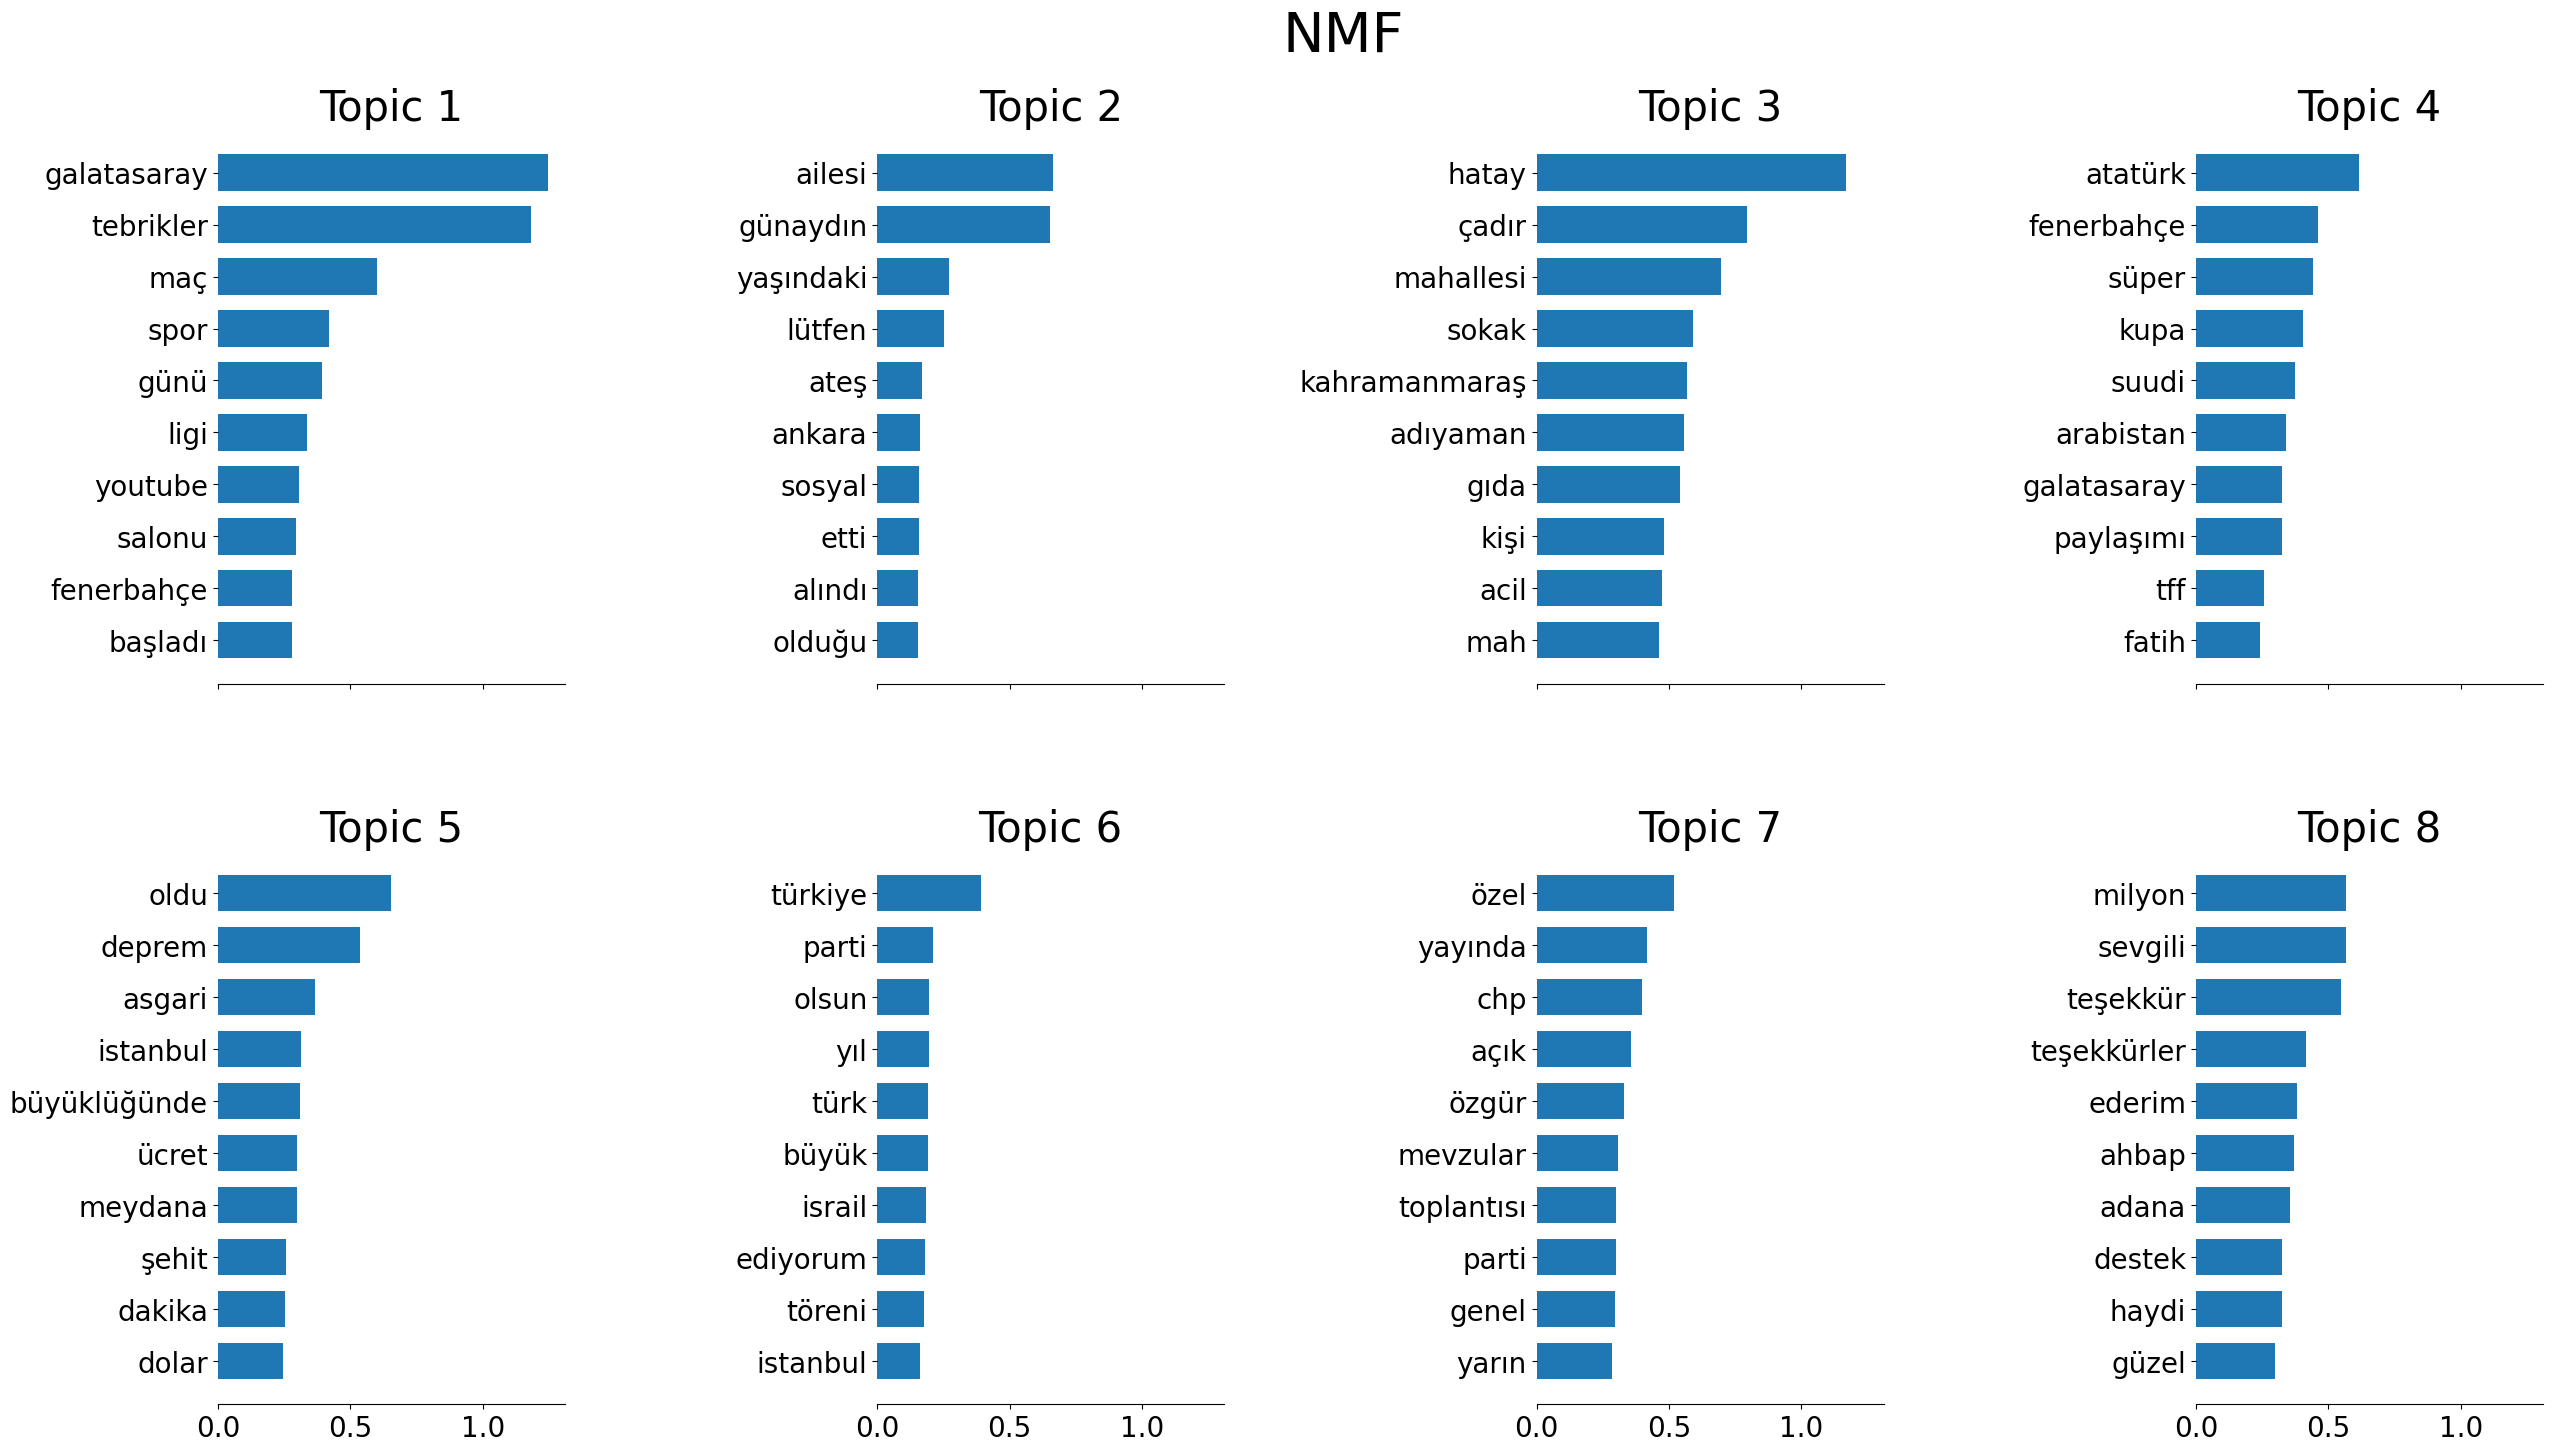

In [19]:
plot_top_words(nmf, feature_names, title="NMF")

In [20]:
Z2 = nmf.transform(X)

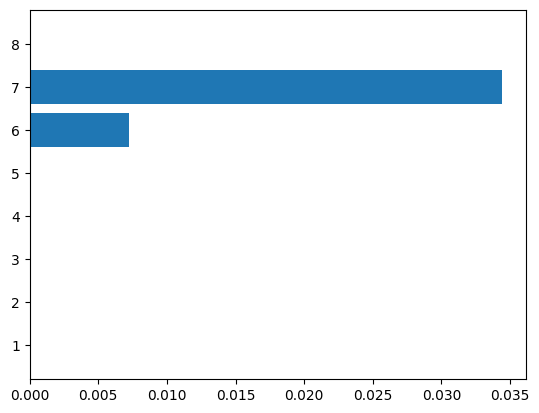

İlgililere sesleniyorum. Bölgedeki barajları kontrol ediniz


In [28]:
i = np.random.choice(len(df))
doc = Z2[i]
topics = np.arange(8) + 1

fig, ax = plt.subplots()
ax.barh(topics, doc)
ax.set_yticks(topics)
plt.show()

print(df.iloc[i]["text"])